In [1]:
import pickle
import time 
import os

# Pickle

In [23]:
# Create files directory if needed
directory = "Datahandling/files"
if not os.path.exists(directory):
    os.makedirs(directory)
    print("created directory: {}".format(directory))

created directory: Datahandling/files


In [24]:
# Save as pickle
data = ["A", "b", "C", "d"]

filepath = "{}/{}".format(directory, "test.pkl")

with open(filepath, "wb") as f:
    pickle.dump(data, f)

In [25]:
# Load from pickle
with open(filepath, "rb") as f:
    data = pickle.load(f)
    
print(data)

['A', 'b', 'C', 'd']


# Profiling

### With time

In [2]:
start = time.time() 

# Your code here

print("Time Consumed") 
print("% s seconds" % (time.time() - start))

Time Consumed
0.001590728759765625 seconds


### With cProfile

In [6]:
import cProfile 
  
cProfile.run("""

# Your code here.
x = [i for i in range(1000000)]

""") 

         4 function calls in 0.110 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.110    0.110    0.110    0.110 <string>:4(<listcomp>)
        1    0.000    0.000    0.110    0.110 <string>:4(<module>)
        1    0.000    0.000    0.110    0.110 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




# Zip

In [ ]:
import shutil
shutil.make_archive(output_filename, 'zip', dir_name) 

# Asyncio

Note that there are differences between running asyncio in a script vs. in a notebook! See first link. The examples below are for a notebook.

- https://stackoverflow.com/questions/55409641/asyncio-run-cannot-be-called-from-a-running-event-loop
- https://faculty.ai/blog/a-guide-to-using-asyncio/
- https://developer.ibm.com/tutorials/ba-on-demand-data-python-3/
- https://realpython.com/async-io-python/#when-and-why-is-async-io-the-right-choice
- https://docs.python.org/3/library/asyncio-eventloop.html#running-and-stopping-the-loop


### Example 1

In [7]:
import asyncio

async def print_after(message, delay):
    """Print a message after the specified delay (in seconds)"""
    await asyncio.sleep(delay)
    print(message)

async def main():
    # Use asyncio.gather to run two coroutines concurrently:
    await asyncio.gather(
        print_after("world!", 2),
        print_after("Hello", 1)
    )

await main()


Hello
world!


### Example 2

You can see that the order will not be 100, 90, ..., 10. At least one value in this order will be flipped. This shows that the code is actually executed asynchronously. Just exchange the task function with something else and adjust the params. This example generalizes well to other problems e.g. where you'd loop through all pairs of parameters.

In [27]:
import asyncio
from concurrent.futures import ThreadPoolExecutor
import random

# Task that is to be run for all N pairs of elements from the lists param1 and param2
def task(param1, param2):
    
    # Can also be a complex task, e.g. API request and writing to file
    n = random.randint(0, 100000)
    for i in range(n):
        param1 * param2
        
    if param1 % 10 == 0:
        print("{}\n".format(param1)) 
    
# Asynchronous function that executes the N tasks until complete
async def async_tasks(params):
    
    params1 = params[0] # list of length N
    params2 = params[1] # list of length N
    N = len(params1)
    
    with ThreadPoolExecutor(max_workers=20) as executor:

        loop = asyncio.get_event_loop()

        tasks = []

        for i in range(N):
            tasks.append(loop.run_in_executor(executor, task, *(params1[i], params2[i])))
            #tasks.append(await asyncio.sleep(0.01)) # waiting in case of call restrictions
            
# Execute the tasks asynchronously
params1 = list(range(100, 0, -1))
params2 = list(range(100, 0, -1))
params = [params1, params2]

await async_tasks(params)

## For scripts
# loop = asyncio.get_event_loop() # or .new_event_loop()
# loop.run_until_complete(async_tasks(params))
# loop.stop()


100

90

80

70

60

50

40

30

10
20




# Removing code from Jupyter notebooks

Execute the following code in the terminal. You might have to install the following: 

- https://nbconvert.readthedocs.io/en/latest/install.html
- https://github.com/ipython-contrib/jupyter_contrib_nbextensions


In [ ]:
jupyter nbconvert notebook_to_convert.ipynb --to=html --TemplateExporter.exclude_input=True

# Hardware Info

Note that these commands may not always work immediately. The worked for me on Kaggle in June 2019.

References: 

- https://www.binarytides.com/linux-commands-hardware-info/
- https://www.pythoncircle.com/post/535/python-script-9-getting-system-information-in-linux-using-python-script/

In [ ]:
!cat /proc/cpuinfo

In [ ]:
!cat /proc/meminfo

In [ ]:
!lscpu

In [ ]:
import platform

# Architecture
print("Architecture: " + platform.architecture()[0])

# machine
print("Machine: " + platform.machine())

# node
print("Node: " + platform.node())

# processor
print("Processors: ")
with open("/proc/cpuinfo", "r")  as f:
    info = f.readlines()

cpuinfo = [x.strip().split(":")[1] for x in info if "model name"  in x]
for index, item in enumerate(cpuinfo):
    print("    " + str(index) + ": " + item)

# system
print("System: " + platform.system())

# distribution
dist = platform.dist()
dist = " ".join(x for x in dist)
print("Distribution: " + dist)

# Load
with open("/proc/loadavg", "r") as f:
    print("Average Load: " + f.read().strip())

# Memory
print("Memory Info: ")
with open("/proc/meminfo", "r") as f:
    lines = f.readlines()

print("     " + lines[0].strip())
print("     " + lines[1].strip())

# uptime
uptime = None
with open("/proc/uptime", "r") as f:
    uptime = f.read().split(" ")[0].strip()
uptime = int(float(uptime))
uptime_hours = uptime // 3600
uptime_minutes = (uptime % 3600) // 60
print("Uptime: " + str(uptime_hours) + ":" + str(uptime_minutes) + " hours")

# Plotting images

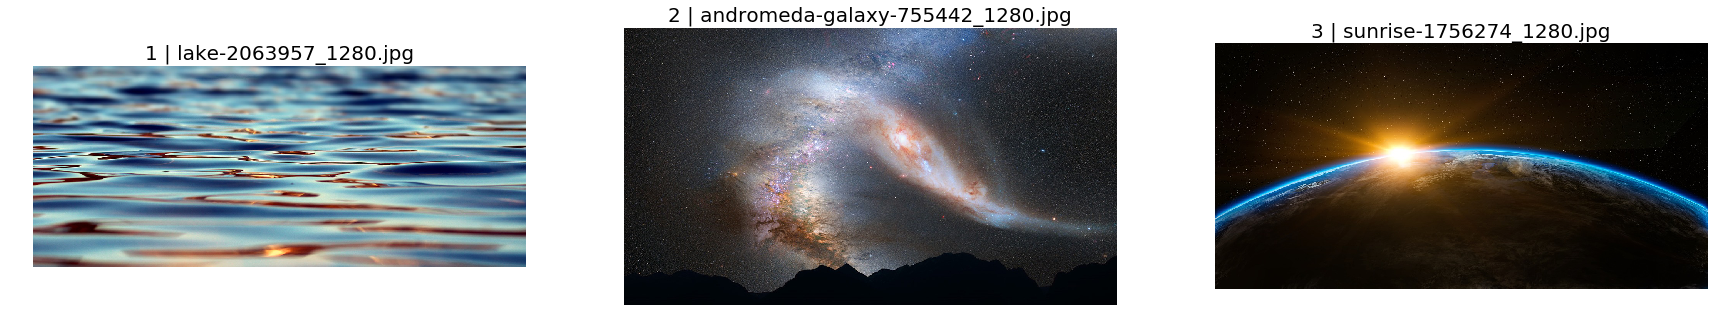

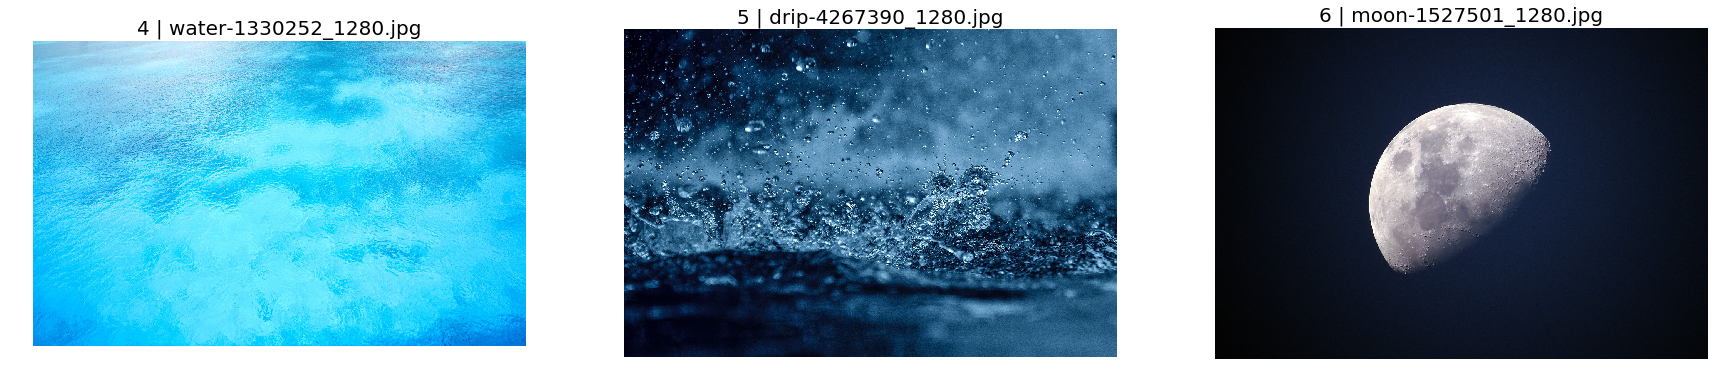

In [19]:
%matplotlib inline

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Plot data
directory = "img"
filenames = [filename for filename in os.listdir(directory) if filename != '.DS_Store']

for i in range(0, len(filenames), 3):

    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(30,15));
    
    img=mpimg.imread('{}/{}'.format(directory, filenames[i]));
    axes[0].imshow(img[:,:,:]);
    axes[0].set_title("{} | {}".format(i+1, filenames[i]), fontsize = 20);
    axes[0].axis('off')

    img=mpimg.imread('{}/{}'.format(directory, filenames[i+1]));
    axes[1].imshow(img[:,:,:]);
    axes[1].set_title("{} | {}".format(i+2, filenames[i+1]), fontsize = 20);
    axes[1].axis('off')

    img=mpimg.imread('{}/{}'.format(directory, filenames[i+2]));
    axes[2].imshow(img[:,:,:]);
    axes[2].set_title("{} | {}".format(i+3, filenames[i+2]), fontsize = 20);
    axes[2].axis('off')
    plt.show();